In [1]:
import requests, json
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()

# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 8436263}


In [3]:
# get player data from 'elements' field
players = r['elements']

# show data for first player
pprint(players[0])

{'assists': 0,
 'bonus': 0,
 'bps': 48,
 'chance_of_playing_next_round': None,
 'chance_of_playing_this_round': None,
 'clean_sheets': 0,
 'code': 80201,
 'corners_and_indirect_freekicks_order': None,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -3,
 'cost_change_start_fall': 3,
 'creativity': '0.0',
 'creativity_rank': 554,
 'creativity_rank_type': 57,
 'direct_freekicks_order': None,
 'direct_freekicks_text': '',
 'dreamteam_count': 0,
 'element_type': 1,
 'ep_next': '0.5',
 'ep_this': '0.5',
 'event_points': 0,
 'first_name': 'Bernd',
 'form': '0.0',
 'goals_conceded': 9,
 'goals_scored': 0,
 'ict_index': '7.9',
 'ict_index_rank': 305,
 'ict_index_rank_type': 22,
 'id': 1,
 'in_dreamteam': False,
 'influence': '79.0',
 'influence_rank': 200,
 'influence_rank_type': 22,
 'minutes': 270,
 'news': '',
 'news_added': None,
 'now_cost': 47,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_order': None,
 'pena

In [5]:
# create players dataframe
players = pd.json_normalize(r['elements'])

# show some information about first five players
players[['id', 'web_name', 'team', 'element_type']].head()

,id,web_name,team,element_type
0,1,Leno,1,1
1,2,Rúnarsson,1,1
2,3,Willian,1,3
3,4,Aubameyang,1,4
4,5,Cédric,1,2


In [6]:
# create teams dataframe
teams = pd.json_normalize(r['teams'])

teams[['id', 'name']]

,id,name
0,1,Arsenal
1,2,Aston Villa
2,3,Brentford
3,4,Brighton
4,5,Burnley
5,6,Chelsea
6,7,Crystal Palace
7,8,Everton
8,9,Leicester
9,10,Leeds


In [7]:
# get position information from 'element_types' field
positions = pd.json_normalize(r['element_types'])

positions.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],70
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],209
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],253
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],85


In [8]:
# join players to teams
df = pd.merge(
    left=players,
    right=teams,
    left_on='team',
    right_on='id'
)

# show joined result
df[['first_name', 'second_name', 'name']].head()

,first_name,second_name,name
0,Bernd,Leno,Arsenal
1,Rúnar Alex,Rúnarsson,Arsenal
2,Willian,Borges Da Silva,Arsenal
3,Pierre-Emerick,Aubameyang,Arsenal
4,Cédric,Soares,Arsenal


In [9]:
# join player positions
df = df.merge(
    positions,
    left_on='element_type',
    right_on='id'
)

# rename columns
df = df.rename(
    columns={'name':'team_name', 'singular_name':'position_name'}
)

# show result
df[
    ['first_name', 'second_name', 'team_name', 'position_name']
].head()

,first_name,second_name,team_name,position_name
0,Bernd,Leno,Arsenal,Goalkeeper
1,Rúnar Alex,Rúnarsson,Arsenal,Goalkeeper
2,Karl,Hein,Arsenal,Goalkeeper
3,Aaron,Ramsdale,Arsenal,Goalkeeper
4,Arthur,Okonkwo,Arsenal,Goalkeeper


In [10]:
# get data from 'element-summary/{PID}/' endpoint for PID=4
r = requests.get(base_url + 'element-summary/4/').json()

# show top-level fields for player summary
pprint(r, depth=1)

{'fixtures': [...], 'history': [...], 'history_past': [...]}


In [11]:
# show data for first gameweek
pprint(r['history'][0])

{'assists': 0,
 'bonus': 0,
 'bps': 0,
 'clean_sheets': 0,
 'creativity': '0.0',
 'element': 4,
 'fixture': 1,
 'goals_conceded': 0,
 'goals_scored': 0,
 'ict_index': '0.0',
 'influence': '0.0',
 'kickoff_time': '2021-08-13T19:00:00Z',
 'minutes': 0,
 'opponent_team': 3,
 'own_goals': 0,
 'penalties_missed': 0,
 'penalties_saved': 0,
 'red_cards': 0,
 'round': 1,
 'saves': 0,
 'selected': 200068,
 'team_a_score': 0,
 'team_h_score': 2,
 'threat': '0.0',
 'total_points': 0,
 'transfers_balance': 0,
 'transfers_in': 0,
 'transfers_out': 0,
 'value': 100,
 'was_home': False,
 'yellow_cards': 0}


In [12]:
def get_gameweek_history(player_id):
    '''get all gameweek info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history' data from response into dataframe
    df = pd.json_normalize(r['history'])
    
    return df


# show player #4's gameweek history
get_gameweek_history(4)[
    [
        'round',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head()

,round,total_points,minutes,goals_scored,assists
0,1,0,0,0,0
1,2,1,29,0,0
2,3,1,58,0,0
3,4,9,90,1,0
4,5,2,90,0,0


In [13]:
def get_season_history(player_id):
    '''get all past season info for a given player_id'''
    
    # send GET request to
    # https://fantasy.premierleague.com/api/element-summary/{PID}/
    r = requests.get(
            base_url + 'element-summary/' + str(player_id) + '/'
    ).json()
    
    # extract 'history_past' data from response into dataframe
    df = pd.json_normalize(r['history_past'])
    
    return df


# show player #1's season history
get_season_history(1)[
    [
        'season_name',
        'total_points',
        'minutes',
        'goals_scored',
        'assists'
    ]
].head(10)

,season_name,total_points,minutes,goals_scored,assists
0,2018/19,106,2835,0,0
1,2019/20,114,2649,0,0
2,2020/21,131,3131,0,0


In [14]:
# try and make a function that finds the underlying stats for all players
# need to find a way of importing these!

# def get_underlying_stats(player_id):
#     '''get gameweek info inc underlying stats like shots, big chances created etc.'''

In [15]:
# select columns of interest from players df
players = players[
    ['id', 'first_name', 'second_name', 'web_name', 'team',
     'element_type']
]

# join team name
players = players.merge(
    teams[['id', 'name']],
    left_on='team',
    right_on='id',
    suffixes=['_player', None]
).drop(['team', 'id'], axis=1)

# join player positions
players = players.merge(
    positions[['id', 'singular_name_short']],
    left_on='element_type',
    right_on='id'
).drop(['element_type', 'id'], axis=1)

players.head()

,id_player,first_name,second_name,web_name,name,singular_name_short
0,1,Bernd,Leno,Leno,Arsenal,GKP
1,2,Rúnar Alex,Rúnarsson,Rúnarsson,Arsenal,GKP
2,532,Karl,Hein,Hein,Arsenal,GKP
3,559,Aaron,Ramsdale,Ramsdale,Arsenal,GKP
4,572,Arthur,Okonkwo,Okonkwo,Arsenal,GKP


In [16]:
from tqdm.auto import tqdm
tqdm.pandas()

In [17]:
# get gameweek histories for each player
points = players['id_player'].progress_apply(get_gameweek_history)

# combine results into single dataframe
points = pd.concat(df for df in points)

# join web_name & position!
points = players[['id_player', 'web_name', 'singular_name_short']].merge(
    points,
    left_on='id_player',
    right_on='element'
)

  0%|          | 0/617 [00:00<?, ?it/s]

In [18]:
# convert columns 'influence', 'creativity', 'threat', 'ict_index' into numeric type
points[['influence', 'creativity', 'threat', 'ict_index']] = points[['influence', 'creativity', 'threat', 'ict_index']].apply(pd.to_numeric)

In [19]:
# get top scoring players
aggregate_points = points.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'ict_index': 'sum', 'influence': 'sum', 
     'threat': 'sum', 'creativity': 'sum'}
).reset_index(
).sort_values(
    'ict_index', ascending=False
)

aggregate_points.head()

,element,web_name,total_points,goals_scored,assists,ict_index,influence,threat,creativity
232,233,Salah,83,7,5,124.3,394.8,583.0,264.9
412,413,Antonio,50,5,4,100.3,272.6,499.0,231.2
276,277,Fernandes,43,4,2,96.1,268.8,240.0,450.9
229,230,Mané,49,5,1,86.9,227.6,483.0,159.3
204,205,Vardy,56,7,1,75.0,272.4,365.0,111.8


In [ ]:
# Make a plotting function. It should take a minimum of one stats as argument, and an optional argument of position 

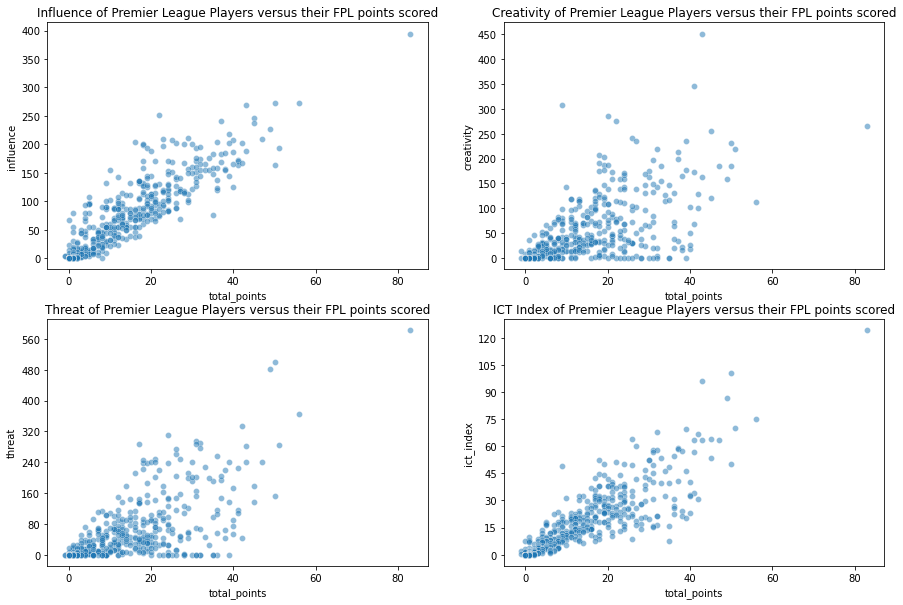

<Figure size 432x288 with 0 Axes>

In [20]:
# Finding the best players, wrt influence, creativity, threat and ict_index
# We will then take a look at if these metrics tend to correlate with more goals, assists and crucially, points

f, axes = plt.subplots(2, 2, figsize = (15, 10))

p1 = sns.scatterplot(data=aggregate_points, x='total_points', y='influence', ax=axes[0,0], alpha=0.5)
axes[0,0].set_title("Influence of Premier League Players versus their FPL points scored")
axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(10))

p2 = sns.scatterplot(data=aggregate_points, x='total_points', y='creativity', ax=axes[0,1], alpha=0.5)
axes[0,1].set(title = "Creativity of Premier League Players versus their FPL points scored")
axes[0,1].yaxis.set_major_locator(plt.MaxNLocator(10))

p3 = sns.scatterplot(data=aggregate_points, x='total_points', y='threat', ax=axes[1,0], alpha=0.5)
axes[1,0].set_title("Threat of Premier League Players versus their FPL points scored")
axes[1,0].yaxis.set_major_locator(plt.MaxNLocator(10))

p4 = sns.scatterplot(data=aggregate_points, x='total_points', y='ict_index', ax=axes[1,1], alpha=0.5)
axes[1,1].set_title("ICT Index of Premier League Players versus their FPL points scored")
axes[1,1].yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()
plt.clf()

# There is clearly very strong correlation between these metrics and points scored. But we can also infer some
# information about certain players based on these plots. The correlation for each appears to be linear, so any 
# players considerably below the diagonal on each plot represent players who are outscoring their underlying stats –
# e.g players who are finishing well on relatively few shots in the case of threat, or holding out for a lucky clean
# sheet without doing much to earn it. These players may not be worth pursuing, unless they are clearly very strong.
# The players above the diagonal present interesting opportunities, particularly in the case of creativity and threat.
# These players have scored relatively few points compared with their underlying stats, which either suggests they are
# poor finishers etc. or just very unlucky – if so, their luck may change at some point!

# For example, Jared Bowen. Very good last year, probably not much picked because of Benrahma. Not that much to choose
# in terms of ict index, but massive gulf in points. One to watch perhaps.

In [21]:
points.describe()

,id_player,element,fixture,opponent_team,total_points,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
count,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4.743000e+03,4.743000e+03,4.743000e+03,4.743000e+03
mean,297.360320,297.360320,41.269661,10.482606,1.390892,1.446764,1.176681,4.582754,33.265022,0.043011,0.039216,0.115328,0.491672,0.001687,0.000422,0.000633,0.058824,0.001898,0.094033,0.106894,6.091503,7.263335,5.035800,5.787476,1.808244,52.257854,-3.860426e-01,1.980362e+05,2.238410e+04,2.237589e+04
std,171.885881,171.885881,23.001128,5.782912,2.503447,1.323498,1.094245,2.280206,40.912318,0.217936,0.213774,0.319451,0.948863,0.041039,0.020533,0.025144,0.235319,0.043524,0.608540,0.484427,9.627415,12.521842,11.120518,14.320780,3.108521,12.711473,8.921041e+04,4.817882e+05,8.143933e+04,6.855700e+04
min,1.000000,1.000000,1.000000,1.000000,-3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,39.000000,-1.734284e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,149.000000,149.000000,22.000000,5.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,-3.099000e+03,6.097500e+03,7.450000e+01,3.630000e+02
50%,297.000000,297.000000,42.000000,11.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,-2.590000e+02,2.661400e+04,9.380000e+02,2.360000e+03
75%,445.000000,445.000000,61.000000,15.000000,2.000000,2.000000,2.000000,7.000000,90.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,11.200000,3.100000,2.500000,2.700000,55.000000,0.000000e+00,1.305335e+05,8.567000e+03,1.461300e+04
max,617.000000,617.000000,80.000000,20.000000,20.000000,5.000000,5.000000,8.000000,90.000000,3.000000,4.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,3.000000,99.000000,125.400000,136.200000,135.000000,27.700000,127.000000,1.983733e+06,5.296809e+06,2.104464e+06,1.782662e+06


In [22]:
# One thing we may want to do is filter to only include the latest game week
# This will mean we have the up-to-date data on threat, influence, creativity etc.

current_gameweek = max(points['round'])
points_latest = points.loc[points['round'] == current_gameweek]
points_latest.head()

,id_player,web_name,singular_name_short,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
7,1,Leno,GKP,1,71,7,0,True,2021-10-18T19:00:00Z,2,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,47,-7660,98912,1943,9603
15,2,Rúnarsson,GKP,2,71,7,0,True,2021-10-18T19:00:00Z,2,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,-4102,73624,0,4102
23,532,Hein,GKP,532,71,7,0,True,2021-10-18T19:00:00Z,2,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,-609,46868,1193,1802
30,559,Ramsdale,GKP,559,71,7,2,True,2021-10-18T19:00:00Z,2,2,8,90,0,0,0,2,0,0,0,0,0,4,0,16,18.6,0.0,0.0,1.9,46,188376,514981,206864,18488
36,572,Okonkwo,GKP,572,71,7,0,True,2021-10-18T19:00:00Z,2,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,-71,10825,460,531


In [23]:
# Now take a look at top-scoring players for the latest gameweek

points_latest.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum'}
).reset_index(
).sort_values(
    'total_points', ascending=False
).head(20)

,element,web_name,total_points,goals_scored,assists
227,228,Firmino,20,3,1
134,135,Chilwell,15,1,0
408,409,Ogbonna,15,1,0
232,233,Salah,13,1,1
34,35,McGinn,13,1,1
356,357,Kane,12,1,1
260,261,Bernardo,11,1,0
250,251,De Bruyne,11,1,0
209,210,Tielemans,10,1,0
142,143,Mendy,9,0,0


In [24]:
# So, what do we want to find out?
# Some interesting data points we can work with wrt historical player data:

# Points!

# Raw numbers like: minutes, goals_scored, assists, clean_sheets, goals_conceded, own_goals,
# Also: penalties_saved, penalties_missed, yellow_cards, red_cards, saves, bonus

# Aggregate stats like: influence, creativity, threat, ict_index
# Of course we then want to compare these kind of things to a player's value, and their upcoming fixtures etc.

# People know how to judge players on past performance on all this stuff because it's easily accessible, but maybe not
# if we combine some of the more obscure metrics with price, to find the best value players

In [25]:
# Last few games. To see if any players seem to be coming into or dropping out of form
points_last_few = points.loc[(points['round'] >= 5) & (points['singular_name_short'] == 'MID')]

points_last_few.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'value': 'mean', 'ict_index': 'sum'}
).reset_index(
).sort_values(
    'total_points', ascending=False
).head(20)

# points_last_few.head()

,element,web_name,total_points,goals_scored,assists,value,ict_index
102,233,Salah,45,4,3,126.00,63.8
153,359,Son,28,2,2,100.25,45.2
170,399,Sarr,27,3,0,62.00,34.2
100,230,Mané,25,3,0,119.00,29.0
201,482,Townsend,24,2,0,54.75,40.3
108,251,De Bruyne,23,2,0,119.00,34.7
89,210,Tielemans,23,1,2,64.25,40.0
178,420,Bowen,23,1,3,63.00,38.5
9,22,Saka,22,1,2,63.00,22.9
41,96,Mbeumo,20,2,0,55.00,27.1


In [26]:
# Let's make a dataframe of my current team, and see players total historical and recent performance
my_players = ['Sánchez', 'Duffy', 'Alonso', 'Marçal', 'Jota', 'Doucouré', 'Benrahma', 'Salah', 'Gray', 'Lukaku', 
              'Jiménez', 'Steer', 'Alexander-Arnold', 'Manquillo', 'Antonio']

# filter points dataframe to just include my players
my_team = points.loc[points.web_name.str.contains("|".join(my_players))]

# get rid of the wrong Gray, so we just have Demarai
my_team = my_team.loc[my_team['id_player'] != 383]

# get rid of the wrong Sanchez, so we just have the Brighton one
my_team = my_team.loc[my_team['id_player'] != 367]

# filter to current week and check length is 15 to make sure the whole team there...
my_team_latest =  my_team.loc[points['round'] == current_gameweek]
print(my_team_latest.shape)
my_team_latest

(15, 34)


,id_player,web_name,singular_name_short,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,value,transfers_balance,selected,transfers_in,transfers_out
44,28,Steer,GKP,28,72,20,0,True,2021-10-16T14:00:00Z,2,3,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,-4756,300746,7643,12399
112,69,Sánchez,GKP,69,78,15,6,False,2021-10-16T14:00:00Z,0,0,8,90,0,0,1,0,0,0,0,0,0,2,0,25,14.8,0.0,0.0,1.5,46,-20991,2016052,69759,90750
1249,173,Doucouré,MID,173,74,19,2,True,2021-10-17T13:00:00Z,0,1,8,90,0,0,0,1,0,0,0,0,0,0,0,9,13.0,22.7,9.0,4.5,57,198297,633456,231061,32764
1281,484,Gray,MID,484,74,19,2,True,2021-10-17T13:00:00Z,0,1,8,90,0,0,0,1,0,0,0,0,0,0,0,16,16.0,36.2,27.0,7.9,58,-6162,1591226,109395,115557
1574,233,Salah,MID,233,80,18,13,False,2021-10-16T11:30:00Z,0,5,8,90,1,1,1,0,0,0,0,0,0,0,2,43,64.0,30.5,91.0,18.6,127,306885,5296809,317190,10305
1598,240,Jota,MID,240,80,18,0,False,2021-10-16T11:30:00Z,0,5,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,76,-154543,1328230,85411,239954
2338,419,Benrahma,MID,419,74,8,3,False,2021-10-17T13:00:00Z,0,1,8,86,0,0,1,0,0,0,0,0,0,0,0,7,2.6,15.3,24.0,4.2,66,-78377,3039592,137651,216028
2703,529,Lukaku,FWD,529,73,3,2,False,2021-10-16T16:30:00Z,0,1,8,76,0,0,1,0,0,0,0,0,0,0,0,3,3.6,12.8,9.0,2.5,117,-16795,3063760,259169,275964
3098,413,Antonio,FWD,413,74,8,1,False,2021-10-17T13:00:00Z,0,1,8,90,0,0,1,0,0,0,0,1,0,0,0,-1,9.8,36.7,74.0,12.1,81,69158,3863555,210545,141387
3106,430,Jiménez,FWD,430,72,2,1,False,2021-10-16T14:00:00Z,2,3,8,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.1,2.0,0.1,76,118271,594501,177092,58821


In [27]:
# How are my players performing. Who's best?

my_team.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'minutes': 'sum'}
).reset_index(
).sort_values(
    'total_points', ascending=False
).head(20)

# Luke Shaw does not appear to be performing that well in comparison to the rest of the team
# And he's been in my team from the start of the year. He looks a likely candidate for replacement

,element,web_name,total_points,goals_scored,assists,minutes
5,233,Salah,83,7,5,720
9,413,Antonio,50,5,4,628
10,419,Benrahma,47,3,2,679
4,173,Doucouré,45,2,4,720
6,237,Alexander-Arnold,41,0,2,513
1,56,Duffy,40,1,1,720
3,122,Alonso,39,1,1,535
13,484,Gray,38,3,1,683
7,240,Jota,32,3,0,500
2,69,Sánchez,31,0,0,720


,element,total_points,goals_scored,assists,minutes,value
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,305.363636,10.679426,0.114833,0.210526,285.966507,46.403469
std,174.448642,12.201734,0.348375,0.557884,271.942520,5.468733
min,5.000000,-1.000000,0.000000,0.000000,0.000000,39.375000
25%,161.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,302.000000,5.000000,0.000000,0.000000,247.000000,45.000000
75%,446.000000,18.000000,0.000000,0.000000,521.000000,49.375000
max,617.000000,50.000000,2.000000,3.000000,720.000000,75.125000


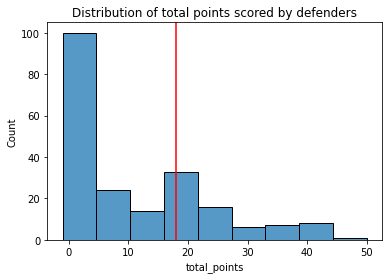

In [28]:
import seaborn as sns

# How does he compare to other defenders. Let's have a look at some stats & plot a histogram of defenders' points
# Filter points df to only include defenders
defenders = points.loc[points.singular_name_short == 'DEF']

# We want to have all their historical points though, so let's group by points
defenders_hist = defenders.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'minutes': 'sum', 'value': 'mean'}
).reset_index(
).sort_values(
    'total_points', ascending=False
)

ax = sns.histplot(data = defenders_hist, x = 'total_points')
ax.set_title('Distribution of total points scored by defenders')
ax.axvline(18, color = 'red')
# So he doesn't appear to be doing tooooo badly for a defender, although there are definitely quite a few with more
# It's probably being skewed by the many many players with no points at all
# He's in the top 25%

defenders_hist.describe()

,element,total_points,goals_scored,assists,minutes,value
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,245.000000,25.211538,0.250000,0.519231,671.096154,49.156250
std,151.471475,9.870408,0.437237,0.804165,62.868135,5.243511
min,16.000000,5.000000,0.000000,0.000000,533.000000,41.125000
25%,109.000000,18.000000,0.000000,0.000000,630.000000,45.000000
50%,242.500000,23.500000,0.000000,0.000000,707.500000,49.312500
75%,392.500000,32.250000,0.250000,1.000000,720.000000,50.031250
max,491.000000,50.000000,1.000000,3.000000,720.000000,65.375000


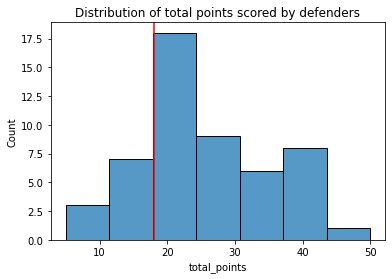

In [29]:
# Let's filter by players that have actually played
# Check out the stats to see what might be a reasonable point to cut off
# Let's go for the 75% mark – at 360 minutes, since Shaw has played all of every game for 450 minutes in total
playing_defenders = defenders_hist.loc[defenders_hist.minutes > defenders_hist.minutes.quantile(q=0.75)]

# Now plot the distrubution of points again
ax = sns.histplot(data = playing_defenders, x = 'total_points')
ax.set_title('Distribution of total points scored by defenders')
ax.axvline(18, color = 'red')

# Again, he looks like he's doing ok... But there are quite a few better!
# Luke Shaw sits somewhere in the 3rd Quartile

playing_defenders.describe()

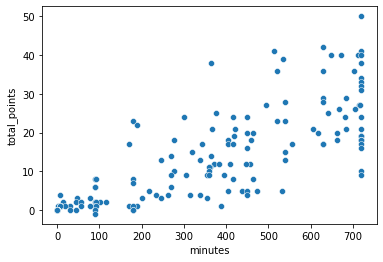

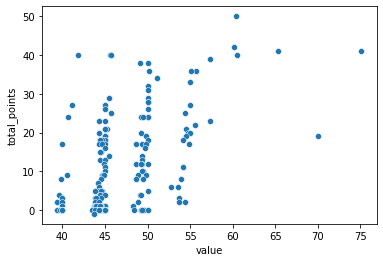

,element,web_name,total_points,goals_scored,assists,minutes,value,ppm
18,56,Duffy,40,1,1,720,41.875,9.552239
26,76,Jansson,40,0,3,711,45.625,8.767123
31,91,Pinnock,40,1,1,672,45.750,8.743169
87,256,Cancelo,50,0,2,720,60.375,8.281573
180,527,Chalobah,38,2,0,363,49.125,7.735369
20,59,Dunk,38,0,0,720,50.000,7.600000
14,44,Cash,36,1,0,703,50.125,7.182045
39,119,Azpilicueta,42,0,3,630,60.125,6.985447
41,122,Alonso,39,1,1,535,57.375,6.797386
126,370,Reguilón,34,0,2,720,51.125,6.650367


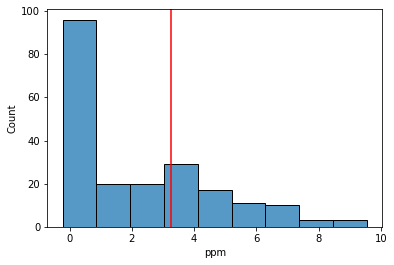

In [30]:
import matplotlib.pyplot as plt
# So we probably want to replace him, just need to think about whom to replace him with

# Plot a couple of scatterplots to see if anyone has scored a lot for the amount of time they have played, and if
# anyone has scored a lot of points for their value

sns.scatterplot(data=defenders_hist, x='minutes', y='total_points')
plt.show()
plt.clf()

sns.scatterplot(data=defenders_hist, x='value', y='total_points')
plt.show()

# Then let's have a look if there is lots of value for money with a histogram showing ppm
# First add a value for money column to the dataframe i.e. points per million
defenders_hist['ppm'] = 10 * defenders_hist.total_points/defenders_hist.value

# Then plot the histogram, with a line to compare Shaw's ppm
ax = sns.histplot(data=defenders_hist, x='ppm')
ax.axvline(18/5.5, color = 'red')

# So there is clearly plenty of value to be found in replacing Shaw
# Finally, we identify exactly who these players are
defenders_hist.sort_values('ppm', ascending=False).head(20)

# Looks like Alonso would be a good bet, and possibly also Jansson & Pinnock of Brentford, and Dias & Rudiger
# What we need to do now is to try and predict how each of these players will perform over the next few weeks,
# and whether it will be significantly different to Shaw's performance. If so, we should swap them.
# We do this later on down the page

In [31]:
# Firstly though, we can add a bit of rigour to the comparison between Shaw's points so far, and each of the players
# we want to replace him with, by using an ANOVA test. For this we take the null hypothesis of each of the samples
# being taken from the same distribtion i.e. points scored in each week by different players are all from the same
# distribution i.e. the players are all the same and it's down to chance who scores what each week.
# Firstly we want to get our data:

best_defenders = ['Shaw', 'Alonso', 'Cancelo', 'Pinnock', 'Jansson', 'Dias', 'Rüdiger']
defenders_to_swap = pd.DataFrame()
for defender in best_defenders:
    defenders_to_swap[defender] =  points.loc[points['web_name'] == defender].total_points.reset_index(drop=True)

print(defenders_to_swap)
print(defenders_to_swap.describe())

# Then run a one way ANOVA test
from scipy.stats import f_oneway

# compare samples
stat, p = f_oneway(defenders_to_swap['Shaw'], defenders_to_swap['Alonso'], defenders_to_swap['Cancelo'], 
                   defenders_to_swap['Pinnock'], defenders_to_swap['Jansson'], defenders_to_swap['Dias'], defenders_to_swap['Rüdiger'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# The ANOVA test would have us believe that Shaw is just as good as all these other great defenders, and just getting
# a bit unlucky over the first few games

# Now try a one-sided ttest between Shaw and the best-scoring defender, Joao Cancelo
from scipy.stats import ttest_ind

# compare samples
stat, p = ttest_ind(defenders_to_swap['Shaw'], defenders_to_swap['Cancelo'], alternative='less')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    
# Cancelo is apparently a better class of player... but taking a quick look at the others, from a stat sig pov
# he is the only one who is better.

   Shaw  Alonso  Cancelo  Pinnock  Jansson  Dias  Rüdiger
0     1      15        2       11        6     2        6
1     4       6        6        6        9    11        6
2     6       2        6        2        7     6        1
3     5       5       12        2        2     7        6
4     2      10        6        8        5     8       14
5     0       1       12        7        4     5        1
6     2       0        0        2        5     0        2
7     0       0        6        2        2     1        0
           Shaw     Alonso   Cancelo    Pinnock   Jansson       Dias  \
count  8.000000   8.000000   8.00000   8.000000  8.000000   8.000000   
mean   2.500000   4.875000   6.25000   5.000000  5.000000   5.000000   
std    2.267787   5.356905   4.20034   3.505098  2.390457   3.779645   
min    0.000000   0.000000   0.00000   2.000000  2.000000   0.000000   
25%    0.750000   0.750000   5.00000   2.000000  3.500000   1.750000   
50%    2.000000   3.500000   6.00000   4.00000

Text(0.5, 1.0, 'Distribution of total points scored by midfielders')

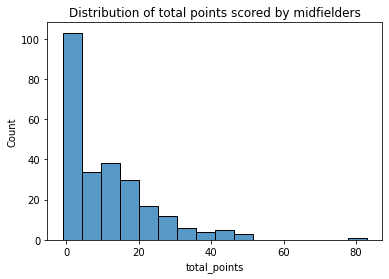

In [32]:
# Filter to just midfielders
midfielders = points.loc[points.singular_name_short == 'MID']

# We want to have all their historical points though, so let's group by points
midfielders_hist = midfielders.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'minutes': 'sum', 'value': 'mean', 'ict_index': 'sum', 'influence': 'sum', 
     'threat': 'sum', 'creativity': 'sum'}
).reset_index(
).sort_values(
    'total_points', ascending=False
)

ax = sns.histplot(data = midfielders_hist, x = 'total_points')
ax.set_title('Distribution of total points scored by midfielders')

Text(0.5, 1.0, 'Distribution of total points scored by playing midfielders')

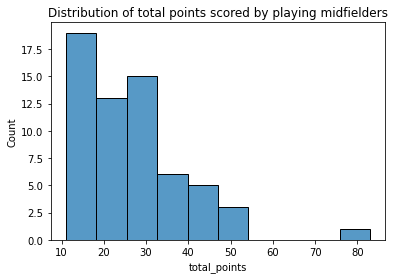

In [33]:
# Filter to just playing midfielders
playing_midfielders = midfielders_hist.loc[midfielders_hist.minutes > midfielders_hist.minutes.quantile(q=0.75)]

ax = sns.histplot(data = playing_midfielders, x = 'total_points')
ax.set_title('Distribution of total points scored by playing midfielders')

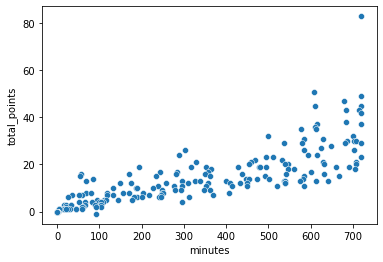

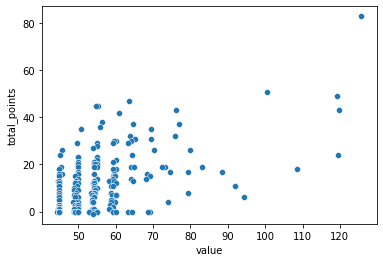

,element,web_name,total_points,goals_scored,assists,minutes,value,ict_index,influence,threat,creativity,ppm
201,482,Townsend,45,3,2,609,54.750,63.8,246.6,136.0,255.5,8.219178
74,173,Doucouré,45,2,4,720,55.375,53.6,237.2,177.0,121.1,8.126411
177,419,Benrahma,47,3,2,679,63.625,63.5,210.0,240.0,184.0,7.387033
170,399,Sarr,42,4,0,720,61.000,66.7,202.0,335.0,129.3,6.885246
52,125,Kovacic,35,1,3,612,50.875,39.8,182.4,98.0,116.8,6.879607
202,484,Gray,38,3,1,683,56.500,57.3,185.4,221.0,165.8,6.725664
102,233,Salah,83,7,5,720,125.750,124.3,394.8,583.0,264.9,6.600398
60,144,Gallagher,36,2,3,610,55.875,54.4,158.2,255.0,130.3,6.442953
156,365,Højbjerg,29,1,1,719,49.625,36.4,211.2,57.0,96.7,5.843829
89,210,Tielemans,37,2,2,720,64.625,58.7,241.8,146.0,198.7,5.725338


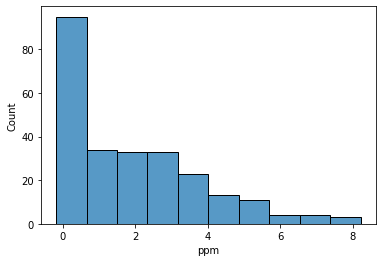

In [34]:
sns.scatterplot(data=midfielders_hist, x='minutes', y='total_points')
plt.show()
plt.clf()

sns.scatterplot(data=midfielders_hist, x='value', y='total_points')
plt.show()

# Then let's have a look if there is lots of value for money with a histogram showing ppm
# First add a value for money column to the dataframe i.e. points per million
midfielders_hist['ppm'] = 10 * midfielders_hist.total_points/midfielders_hist.value

# Then plot the histogram
ax = sns.histplot(data=midfielders_hist, x='ppm')

# So there is clearly plenty of value to be found in replacing Shaw
# Finally, we identify exactly who these players are
midfielders_hist.sort_values('ppm', ascending=False).head(20)

4126
617
4743
Predicting points with Linear Regression – test score: 0.7284946176769719
Predicting points with SVR – test score: 0.6855858178379198


/Users/bally/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


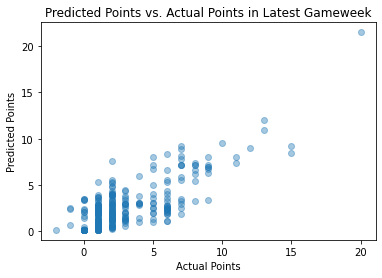

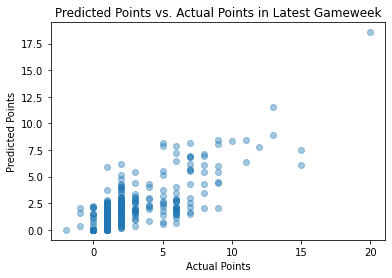

<Figure size 432x288 with 0 Axes>

In [35]:
# Let's build a model to try and figure out if influence, creativity, threat and ict index are any good at predicting
# the points a player will get 

# Split our data into train and test – let's do all but the current gameweek as train, and that as test

train_data = points.loc[points['round'] != current_gameweek]
test_data = points_latest

# Check that's all split properly
print(len(train_data))
print(len(test_data))
print(len(points))

# Now make the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR

# Choose columns to test
cols_to_test = ['influence', 'creativity', 'threat']

# Manually train, test split the data
train_features = train_data[cols_to_test]
train_points = train_data.total_points

test_features = test_data[cols_to_test]
test_points = test_data.total_points

# create and train model on training data
model = LinearRegression(normalize=True)
model.fit(train_features, train_points)

# create and train model on training data
model2 = LinearSVR()
model2.fit(train_features, train_points)

# Score model on test data
print('Predicting points with Linear Regression – test score:', model.score(test_features, test_points))
print('Predicting points with SVR – test score:', model2.score(test_features, test_points))

# make predictions with model
points_prediction = model.predict(test_features)

# plot predictions against actual sales
plt.scatter(test_points, points_prediction, alpha=0.4)
plt.title('Predicted Points vs. Actual Points in Latest Gameweek')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()
plt.clf()

# make predictions with model 2
points_prediction2 = model2.predict(test_features)

# plot predictions against actual sales
plt.scatter(test_points, points_prediction2, alpha=0.4)
plt.title('Predicted Points vs. Actual Points in Latest Gameweek')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()
plt.clf()

       web_name  points_prediction_nxt_wk
662      McGinn                 10.927615
1331  Tielemans                  9.544551
1574      Salah                 12.050854
1670   Bernardo                  8.039159
2110        Son                  8.107203
2174   Ndombele                  8.930245
2492  Lacazette                  8.070690
2807       Daka                  8.336165
2845    Firmino                 21.508678
3002       Kane                  9.022499
3586   Chilwell                  8.392786
4573    Ogbonna                  9.195737
4670      Coady                  8.102245
4678      Saïss                  9.232910


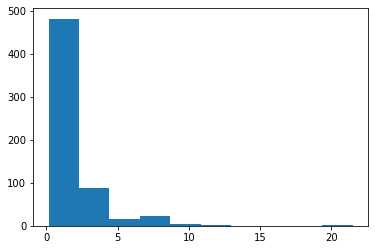

In [36]:
# This model appears to be 'fairly' good at predicting the points players will get
# I would REALLY like to get the raw data that makes up ict index though!
# Anyway let's try and predict next week's top performers with all the data we have available 

# Now let's train the same model on the full data, and make a prediction about week 7's points

# create and train model on training data
model = LinearRegression(normalize=True)
model.fit(points[cols_to_test], points.total_points)

# predict next week's points
points_prediction_nxt_wk = model.predict(test_features)

# make into dataframe so we don't lose the player names
prediction_df = pd.DataFrame(test_data['web_name'])
prediction_df['points_prediction_nxt_wk'] = points_prediction_nxt_wk

# have a look at how they are distributed
plt.hist(points_prediction_nxt_wk)

# filter by the top scorers to see who we should get into the team
top_scorers_nxt_wk = prediction_df[prediction_df['points_prediction_nxt_wk'] > 8]
print(top_scorers_nxt_wk)

# This is just predicting off last week's stats – we need to include some stuff we can predict from next week
# Things like the team they will play against, and whether they are home or away

4126
617
4743
      influence  creativity  threat  was_home
7           0.0         0.0     0.0      True
15          0.0         0.0     0.0      True
23          0.0         0.0     0.0      True
30         18.6         0.0     0.0      True
36          0.0         0.0     0.0      True
...         ...         ...     ...       ...
4710       10.4         1.4    16.0     False
4718        0.0         0.0     0.0     False
4726        0.0         0.0     0.0     False
4734        0.0         0.0     0.0     False
4742        0.0         0.0     0.0     False

[617 rows x 4 columns]
Predicting points earned with influence, creativity, threat & home/away – test score: 0.7279511642286449


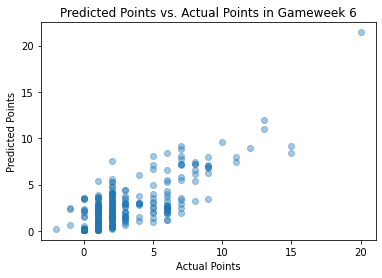

<Figure size 432x288 with 0 Axes>

In [37]:
# First, let's try adding in home & away – that'll be super simple!

# Split our data into train and test – let's do all but the current gameweek as train, and that as test

train_data = points.loc[points['round'] != current_gameweek]
test_data = points_latest

# Check that's all split properly
print(len(train_data))
print(len(test_data))
print(len(points))

# Choose columns to test
cols_to_test = ['influence', 'creativity', 'threat', 'was_home']

# Manually train, test split the data
train_features = train_data[cols_to_test]
train_points = train_data.total_points

test_features = test_data[cols_to_test]
test_points = test_data.total_points

# create and train model on training data
model = LinearRegression(normalize=True)
model.fit(train_features, train_points)

print(test_features)
# Score model on test data
print('Predicting points earned with influence, creativity, threat & home/away – test score:', model.score(test_features, test_points))

# make predictions with model
points_prediction = model.predict(test_features)

# plot predictions against actual sales
plt.scatter(test_points, points_prediction, alpha=0.4)
plt.title('Predicted Points vs. Actual Points in Gameweek 6')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()
plt.clf()

# The model comes out slightly worse than before, surprisingly!

[array(['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Burnley',
       'Chelsea', 'Crystal Palace', 'Everton', 'Leeds', 'Leicester',
       'Liverpool', 'Man City', 'Man Utd', 'Newcastle', 'Norwich',
       'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'],
      dtype=object)]
(4743, 20)
Predicting points earned with minutes, influence, creativity, threat, home/away & opponent – test score: 0.7394486190997673


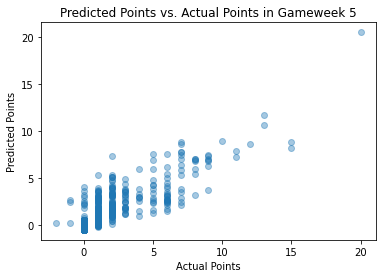

<Figure size 432x288 with 0 Axes>

In [38]:
# Now let's try adding teams in
# Teams are currently encoded as numbers, but of course have no inherent order to them
# Thus we will need to transform the number into the team names, then one-hot key encode to put them into the model

points['opponent_name'] = points.opponent_team.replace({1: 'Arsenal', 2: 'Aston Villa', 3: 'Brentford', 4: 'Brighton',
                                                        5: 'Burnley', 6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton',
                                                        9: 'Leicester', 10: 'Leeds', 11: 'Liverpool', 12: 'Man City',
                                                        13: 'Man Utd', 14: 'Newcastle', 15: 'Norwich', 16: 'Southampton',
                                                        17: 'Spurs', 18: 'Watford', 19: 'West Ham', 20: 'Wolves'})

# Check that's all worked fine
points.head()

# Now one-hot key encode the opponent names for use in the model
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot = encoder.fit_transform(points.opponent_name.values.reshape(-1, 1))
print(encoder.categories_)
print(one_hot.shape)

# We have a 20 x 2902 array of our one-hot encoded team name data
# We have a dataframe with other useful features in 
# We need to turn the 'one-hot' array into a dataframe and join it to our existing dataframe

one_hot_df = pd.DataFrame(one_hot)
data = points.join(one_hot_df)

# Rename columns to actual team names
data = data.rename(columns={0: 'Arsenal', 1: 'Aston Villa', 2: 'Brentford', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea', 
             6: 'Crystal Palace', 7: 'Everton', 8: 'Leicester', 9: 'Leeds', 10: 'Liverpool', 11: 'Man City', 
             12: 'Man Utd', 13: 'Newcastle', 14: 'Norwich', 15: 'Southampton', 16: 'Spurs', 17: 'Watford',
             18: 'West Ham', 19: 'Wolves'})

# Split data into train and test (all gameweeks up to current)
train_data = data.loc[data['round'] != current_gameweek]
test_data = data.loc[data['round'] == current_gameweek]

# Choose columns to test
cols_to_test = ['minutes', 'influence', 'creativity', 'threat', 'was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves']

# Manually train, test split the data
train_features = train_data[cols_to_test]
train_points = train_data.total_points

test_features = test_data[cols_to_test]
test_points = test_data.total_points

# create and train model on training data
model = LinearRegression(normalize=True, positive=True)
model.fit(train_features, train_points)

# Score model on test data
print('Predicting points earned with minutes, influence, creativity, threat, home/away & opponent – test score:', model.score(test_features, test_points))

# make predictions with model
points_prediction = model.predict(test_features)

# plot predictions against actual points
plt.scatter(test_points, points_prediction, alpha=0.4)
plt.title('Predicted Points vs. Actual Points in Gameweek 5')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()
plt.clf()

# When making predictions, we obviously won't know the ict_index and scores that make it up in advance of the game
# So we could make two predictions – one with an average of the scores over all weeks (when playing)
# And one with just the latest week's scores. One will give the in-form predictions, one the more steady bets

Feature: 0, Score: 0.00599
Feature: 1, Score: 0.13407
Feature: 2, Score: 0.00015
Feature: 3, Score: 0.02526
Feature: 4, Score: 0.08276
Feature: 5, Score: 0.88860
Feature: 6, Score: 0.45970
Feature: 7, Score: 0.62009
Feature: 8, Score: 0.67399
Feature: 9, Score: 0.73512
Feature: 10, Score: 0.32865
Feature: 11, Score: 0.73815
Feature: 12, Score: 0.40294
Feature: 13, Score: 0.53933
Feature: 14, Score: 0.45903
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.48388
Feature: 17, Score: 0.44542
Feature: 18, Score: 0.54222
Feature: 19, Score: 1.13083
Feature: 20, Score: 0.83681
Feature: 21, Score: 0.59199
Feature: 22, Score: 0.89504
Feature: 23, Score: 0.34542
Feature: 24, Score: 0.88369


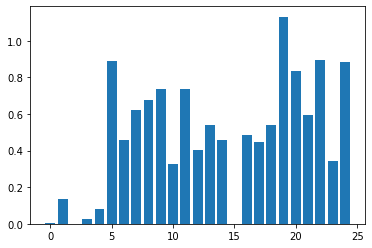

In [39]:
# get importance of model coeffs
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [40]:
# Let's try predicting next week's points, with an average of previous week's ict etc.
# Quickly inspect data to make sure all is well
data.head()

# Next week's data points
# Get average of ict etc. for players in whom we are interested
defenders.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'clean_sheets': 'sum', 'influence': 'mean',
     'creativity': 'mean', 'threat': 'mean'}
).reset_index(
).sort_values(
    'total_points', ascending=False
).head(8)

,element,web_name,total_points,goals_scored,assists,clean_sheets,influence,creativity,threat
87,256,Cancelo,50,0,2,6,20.375,23.2000,19.000
39,119,Azpilicueta,42,0,3,4,20.875,12.5250,5.375
74,229,van Dijk,41,0,1,5,20.425,8.6375,13.375
76,237,Alexander-Arnold,41,0,2,4,21.525,43.2375,14.500
26,76,Jansson,40,0,3,3,15.525,3.3250,9.375
18,56,Duffy,40,1,1,4,25.900,2.3750,21.750
31,91,Pinnock,40,1,1,3,23.425,6.2625,11.375
90,262,Dias,40,0,1,5,20.600,12.8250,6.750


In [41]:
# Next week's data, for the players we care about (Alonso, Dias, Rudiger, Pinnock & Jansson)

next_week = pd.DataFrame(columns = ['web_name', 'influence', 'creativity', 'threat', 'was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'])
next_week['web_name'] = ['Alonso', 'Dias', 'Rudiger', 'Pinnock', 'Jansson']
next_week['influence'] = [28.24, 26.24, 20.20, 18.80, 17.08]
next_week['creativity'] = [34.74, 20.10, 58.48, 2.64, 4.20]
next_week['threat'] = [24.8, 3.2, 17.6, 2.0, 1.2]
next_week['was_home'] = [True, False, True, False, False]
next_week['Southampton'] = [1.0, 0.0, 1.0, 0.0, 0.0]
next_week['Liverpool'] = [0.0, 1.0, 0.0, 0.0, 0.0]
next_week['West Ham'] = [0.0, 0.0, 0.0, 1.0, 1.0]
next_week = next_week.fillna(0.0)

In [42]:
# Really we should be doing this in a better way than writing shit in


In [43]:
test_features = next_week[['influence', 'creativity', 'threat', 'was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves']]
print(test_features)
points_prediction = model.predict(test_features)

print('Alonso, Dias, Rudiger, Pinnock & Jansson, next gameweek predicted points: ' + str(points_prediction))

   influence  creativity  threat  was_home  Arsenal  Aston Villa  Brentford  \
0      28.24       34.74    24.8      True      0.0          0.0        0.0   
1      26.24       20.10     3.2     False      0.0          0.0        0.0   
2      20.20       58.48    17.6      True      0.0          0.0        0.0   
3      18.80        2.64     2.0     False      0.0          0.0        0.0   
4      17.08        4.20     1.2     False      0.0          0.0        0.0   

   Brighton  Burnley  Chelsea  Crystal Palace  Everton  Leicester  Leeds  \
0       0.0      0.0      0.0             0.0      0.0        0.0    0.0   
1       0.0      0.0      0.0             0.0      0.0        0.0    0.0   
2       0.0      0.0      0.0             0.0      0.0        0.0    0.0   
3       0.0      0.0      0.0             0.0      0.0        0.0    0.0   
4       0.0      0.0      0.0             0.0      0.0        0.0    0.0   

   Liverpool  Man City  Man Utd  Newcastle  Norwich  Southampton  Sp

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 24)

In [ ]:
shaw = points.loc[points['web_name'] == 'Shaw']
shaw.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'goals_scored':'sum', 'assists':'sum', 'clean_sheets': 'sum', 'influence': 'mean',
     'creativity': 'mean', 'threat': 'mean'}
).reset_index(
).sort_values(
    'total_points', ascending=False
).head(8)
# print(shaw)

# Shaw shaw
shaw_next_game = pd.DataFrame(columns = ['web_name', 'influence', 'creativity', 'threat', 'was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves'])
shaw_next_game['web_name'] = ['Shaw']
shaw_next_game['influence'] = [13.92]
shaw_next_game['creativity'] = [43.7]
shaw_next_game['threat'] = [4.2]
shaw_next_game['was_home'] = [True]
shaw_next_game['Everton'] = [1.0]
shaw_next_game = shaw_next_game.fillna(0.0)
shaw_next_game

In [ ]:
test_features = shaw_next_game[['influence', 'creativity', 'threat', 'was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves']]
print(test_features)
points_prediction = model.predict(test_features)
print('Luke Shaw next gameweek predicted points: ' + str(points_prediction))
# So almost all of our suggested other players have higher predicted points than Luke Shaw
# Let's go with the highest – Marcos Alonso!

In [ ]:
# Get stats function!
# Using found script to scrape FPL website for other datapoints, such as goals

from nerodia.browser import Browser
import pandas as pd
import time

# Using Selenium Chrome Options, set headless so the physical GUI of Chrome doesn't have to be used, and no sandbox to avoid crashes on Deepnote
from selenium.webdriver.chrome.options import Options

# Let's put all of this into a function, seeing as we're going to want to check out lots more stats

def get_stats(url, stat):

    options = Options()
    options.add_argument('--headless')

    browser = Browser('chrome', options=options) # Create Browser
    browser.goto(url) # Now use the browser to navigate to the EPL Stats Page

    time.sleep(4) # Allow data time to load into HTML

    df = pd.DataFrame()

    while not browser.div(class_name=['paginationBtn', 'paginationNextContainer', 'inactive']).exists:
      browser.div(class_name=['paginationBtn', 'paginationNextContainer']).fire_event('onClick') 
      df = df.append(pd.read_html(browser.html)[0])
    
    browser.close() # Close Browser

    df = df[df['Stat'] > 0] # Random Players at end of table with 0 shots...
    df = df.reset_index(drop=True) # Reset index otherwise pages are annoying and reset after 19
    df = df.dropna(axis=1, how='all') # Random Unamed Column (all NaN elements, so clear columns where 'all' values are NaN)
    df = df.rename(columns = {'Stat': stat})     # Rename the 'Stat' column to whatever it is we're looking at here so we can add some more stats in later

    return df # Return the whole dataframe, which we can choose whether we want the whole lot of or not, outside the function call



In [ ]:
# Collect the urls for the stats that we are interested in:
shots_url = 'https://www.premierleague.com/stats/top/players/total_scoring_att?se=418'
on_target_url = 'https://www.premierleague.com/stats/top/players/ontarget_scoring_att'
woodwork_url = 'https://www.premierleague.com/stats/top/players/hit_woodwork'
touches_url = 'https://www.premierleague.com/stats/top/players/touches'
passes_url = 'https://www.premierleague.com/stats/top/players/total_pass'
through_ball_url = 'https://www.premierleague.com/stats/top/players/total_through_ball'
crosses_url = 'https://www.premierleague.com/stats/top/players/total_cross'
corners_taken_url = 'https://www.premierleague.com/stats/top/players/corner_taken'
blocks_url = 'https://www.premierleague.com/stats/top/players/outfielder_block'
interceptions_url = 'https://www.premierleague.com/stats/top/players/interception'
tackles_url = 'https://www.premierleague.com/stats/top/players/total_tackle'
# last_man_url = 'https://www.premierleague.com/stats/top/players/last_man_tackle'
clearances_url = 'https://www.premierleague.com/stats/top/players/total_clearance'
headed_clear_url = 'https://www.premierleague.com/stats/top/players/head_clearance'
aerial_won_url = 'https://www.premierleague.com/stats/top/players/aerial_won'
# gk_saves_url = 'https://www.premierleague.com/stats/top/players/saves?po=GOALKEEPER'
# gk_punches_url = 'https://www.premierleague.com/stats/top/players/punches?po=GOALKEEPER'
# gk_claims_url = 'https://www.premierleague.com/stats/top/players/total_high_claim?po=GOALKEEPER'
# gk_sweeper_url = 'https://www.premierleague.com/stats/top/players/total_keeper_sweeper?po=GOALKEEPER'

# And make list of url's and names for speedy collection
urls = [shots_url, on_target_url, woodwork_url, touches_url, passes_url, through_ball_url, crosses_url, corners_taken_url, 
        blocks_url, interceptions_url, tackles_url, clearances_url, headed_clear_url, aerial_won_url]
names = ['Shots', 'Shots on Target', 'Hit Woodwork', 'Touches', 'Passes', 'Through Balls', 'Crosses', 'Corners Taken',
        'Blocks', 'Interceptions', 'Tackles', 'Clearances', 'Headed Clear', 'Aerial Battles Won']

# 'Last Man Tackles', last_man_url,
# For some reason the gk url's do not seem to be working, so we'll comment out all of that and just do outfield positions
# It may also be something to do with stats that have only page... who knows
# Anyway 'last man tackles' doesn't seem to be working either so we'll leave that out for now
# gk_saves_url, gk_punches_url, gk_claims_url, gk_sweeper_url


In [ ]:
# Try them one by one 

shots_df = get_stats(shots_url, 'Shots')

In [ ]:
on_target_df = get_stats(on_target_url, 'Shots on Target')
hit_woodwork_df = get_stats(woodwork_url, ' Hit Woodwork')

In [ ]:
touches_df = get_stats(touches_url, 'Touches')
passes_df = get_stats(passes_url, 'Passes')
through_ball_df = get_stats(through_ball_url, 'Through Balls')

In [ ]:
crosses_df = get_stats(crosses_url, 'Crosses')
corners_taken_df = get_stats(corners_taken_url, 'Corners Taken')
blocks_df = get_stats(blocks_url, 'Blocks')
interceptions_df = get_stats(interceptions_url, 'Interceptions')
tackles_df = get_stats(tackles_url, 'Tackles')

In [ ]:
clearances_df = get_stats(clearances_url, 'Clearances')
headed_clear_df = get_stats(headed_clear_url, 'Headed Clear')
aerial_won_df = get_stats(aerial_won_url, 'Aerial Battles Won')

In [ ]:
# Let's inspect a couple of them
blocks_df.head()

In [ ]:
# Go through each of the dataframes and remove extraneous crap. All we need is the player and the stat
dfs = [shots_df, on_target_df, hit_woodwork_df, touches_df, passes_df, through_ball_df, crosses_df, corners_taken_df, 
        blocks_df, interceptions_df, tackles_df, clearances_df, headed_clear_df, aerial_won_df]
for df in dfs:
    df = df.drop(['Nationality', 'Rank', 'Club'], axis=1, inplace=True)

In [ ]:
# We need to concatenate a bunch of these dataframes so that we can then think about adding it to our original FPL df

from functools import reduce

# compile the list of dataframes you want to merge
dfs
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Player'], how='outer'), dfs)
df_merged.head(10)

In [ ]:
# Replace the NaN's with 0's
df_merged = df_merged.fillna(0)

# Looks to be a hell of lot of repeated rows in here... wonder why. So let's get rid
df_merged = df_merged.drop_duplicates().reset_index(drop=True)

df_merged

In [ ]:
# Next step: join with main points dataframe.
# We have totals for each of these stats, rather than week by week, so will have to take an average
# This should probably be done over the number of weeks that players have been playing to give average of stat per game
# Could do per minute?
# The first step should be removing the first name from our new merged dataframe, as our points df only has surnames
# Make a new column with the names split up:
df_merged['web_name'] = df_merged['Player'].apply(lambda x: x.split()[-1])
df_merged.head(20)

In [ ]:
# Will just need to manually replace Son Heung-Min and Hwang Hee-Chan with Son and Hwang
df_merged.at['web_name', 18] = 'Son'
df_merged.at['web_name', 149] = 'Hwang'

In [ ]:
# The points df contains a lot of players with zero points and zero game time. 
# Get players' overall scores
overall = points.groupby(
    ['element', 'web_name']
).agg(
    {'total_points':'sum', 'minutes':'sum'}
).reset_index(
).sort_values(
    'total_points', ascending=False
)

# Let's have a quick look at a plot
f, ax = plt.subplots(1, 1, figsize = (10, 7))

sns.scatterplot(data=overall, x='minutes', y='total_points', ax=ax, alpha=0.1)
ax.set_title("Points of Premier League Players versus their Minutes Played")
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()

# We just want to count the number of players who have got 0 minutes and 0 points really
print(overall.minutes.value_counts().head())
print(overall.total_points.value_counts().head())
print(len(overall))
# Almost a third of players have no game time at all, and slightly over a third of players have no points!
# So let's remove all of the players with zero game time. I imagine they will be skewing the model towards overeliance
# on simply playing... although you do have to play to get points!
# Make total minutes column to start with    
points['total_minutes'] = points.groupby('element').minutes.transform('sum')
points['games_played'] = points.groupby('element').minutes.transform(lambda x: x.ne(0).sum())

In [ ]:
# Now we want to drop all players with 0 total game time
points.drop(points[points.total_minutes == 0].index, inplace=True)

# Check that it's worked. I.e. the number of games played and total minutes functions are working properly
points.loc[points.web_name == 'Antonio']
# And that there are no players left with 0 minutes
points.loc[points.minutes == 0].head()

In [ ]:
# Go big df first. For each row, take web name, find it in merged stat df, pull across the relevant stats into each
# column and divide the entry by the total number of entries for that plyer in the big points df
# Can we do lambda function or something?

# We should just be able to join the two dataframes on 'web name.' The only thing that may cause a problem is players
# with the same last name. Tbh we could remove whoever plays less of the players that have the same name

points.web_name.value_counts().head(10)
# So we have 16 players who share their name with one other... either we drop them, or we come up with some way around it
# Let's drop for now.

brothers = ['Traoré', 'Sánchez', 'Mendy', 'James', 'Barnes', 'Davies', 'Rodrigo', 'Cresswell']
for name in brothers:
    points.drop(points[points.web_name == name].index, inplace=True)

In [ ]:
# Merge dataframes
stats_df = pd.merge(points, df_merged, on='web_name')
# Well that was easy
stats_df.head(5)

In [ ]:
# Make some new cols with average number of each stat per game
names = ['Shots', 'Shots on Target', 'Hit Woodwork', 'Touches', 'Passes', 'Through Balls', 'Crosses', 'Corners Taken',
        'Blocks', 'Interceptions', 'Tackles', 'Clearances', 'Headed Clear', 'Aerial Battles Won']
for name in names:
    stats_df[name + ' per game'] = stats_df[name] / stats_df.games_played
    
# Also drop those weird '18' and '149' columns that have serious potential to fuck things up
stats_df = stats_df.rename(columns = {18: 'crap', 149: 'shit'})
stats_df
stats_df.drop(['crap', 'shit'], axis=1, inplace=True)

In [ ]:
# Need to redo adding teams in

stats_df['opponent_name'] = stats_df.opponent_team.replace({1: 'Arsenal', 2: 'Aston Villa', 3: 'Brentford', 4: 'Brighton',
                                                        5: 'Burnley', 6: 'Chelsea', 7: 'Crystal Palace', 8: 'Everton',
                                                        9: 'Leicester', 10: 'Leeds', 11: 'Liverpool', 12: 'Man City',
                                                        13: 'Man Utd', 14: 'Newcastle', 15: 'Norwich', 16: 'Southampton',
                                                        17: 'Spurs', 18: 'Watford', 19: 'West Ham', 20: 'Wolves'})

# Check that's all worked fine
stats_df.head()

# Now one-hot key encode the opponent names for use in the model
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot = encoder.fit_transform(stats_df.opponent_name.values.reshape(-1, 1))
print(encoder.categories_)
print(one_hot.shape)

# We have a 20 x 2902 array of our one-hot encoded team name data
# We have a dataframe with other useful features in 
# We need to turn the 'one-hot' array into a dataframe and join it to our existing dataframe

one_hot_df = pd.DataFrame(one_hot)
# stats_df = stats_df.join(one_hot_df)

In [ ]:
# Rename columns to actual team names
stats_df = stats_df.rename(columns={0: 'Arsenal', 1: 'Aston Villa', 2: 'Brentford', 3: 'Brighton', 4: 'Burnley', 5: 'Chelsea', 
             6: 'Crystal Palace', 7: 'Everton', 8: 'Leicester', 9: 'Leeds', 10: 'Liverpool', 11: 'Man City', 
             12: 'Man Utd', 13: 'Newcastle', 14: 'Norwich', 15: 'Southampton', 16: 'Spurs', 17: 'Watford',
             18: 'West Ham', 19: 'Wolves'})

In [ ]:
stats_df.head(5)

# Manually train, test split the data
current_gameweek = max(stats_df['round'])
train_data = stats_df.loc[stats_df['round'] != current_gameweek]
test_data = stats_df.loc[stats_df['round'] == current_gameweek]

# Choose which features we want to test. Last time we did ict etc, teams, home/away. 
# Now we'll do all underlying stats
cols = ['was_home', 'Arsenal', 'Aston Villa', 'Brentford','Brighton', 
                'Burnley', 'Chelsea', 'Crystal Palace', 'Everton', 'Leicester', 'Leeds', 'Liverpool', 'Man City', 
                'Man Utd', 'Newcastle', 'Norwich', 'Southampton', 'Spurs', 'Watford', 'West Ham', 'Wolves', 
                'Shots per game', 'Shots on Target per game', 'Hit Woodwork per game', 'Touches per game', 
                'Passes per game', 'Through Balls per game', 'Crosses per game', 'Corners Taken per game', 
                'Blocks per game', 'Interceptions per game', 'Tackles per game', 'Clearances per game', 
                'Headed Clear per game', 'Aerial Battles Won per game']
cols_to_test = ['minutes', 'influence', 'creativity', 'threat']
# Grab the features and labels from each of the train and test sets
train_features = train_data[cols_to_test]
train_points = train_data.total_points

test_features = test_data[cols_to_test]
test_points = test_data.total_points

# create and train model on training data
model = LinearRegression(normalize=True, positive=True)
model.fit(train_features, train_points)

# Score model on test data
print('Predicting points earned with a bunch of features – test score:', model.score(test_features, test_points))

# make predictions with model
points_prediction = model.predict(test_features)

# plot predictions against actual sales
plt.scatter(test_points, points_prediction, alpha=0.4)
plt.title('Predicted Points vs. Actual Points in Gameweek 6')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()
plt.clf()

In [ ]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()